Whereas fMRI measures changes in blood oxygenation levels in the brain, indirectly indicating neural activity, EEG measures electrical activity by placing electrodes on the scalp. It records the summation of postsynaptic potentials of neurons, providing a more direct measure of neuronal electrical activity and brain dynamics. Unlike fMRI, EEG has excellent temporal resolution, capturing brain activity with millisecond precision; this makes it well-suited for detecting rapid changes in brain activity. EEG data can be stored in different formats:

| Format                       | Extension(s)       | Description                                                                                                           |   |   |   |   |   |   |   |
|------------------------------|--------------------|-----------------------------------------------------------------------------------------------------------------------|---|---|---|---|---|---|---|
| European data format         | .edf               | Each recording consists of a single .edf file. edf+ files are permitted. The capital .EDF extension MUST NOT be used. |   |   |   |   |   |   |   |
| BrainVision Core Data Format | .vhdr, .vmrk, .eeg | Each recording consists of a .vhdr, .vmrk, .eeg file triplet.                                                         |   |   |   |   |   |   |   |
| EEGLAB                       | .set, .fdt         | The format used by the MATLAB toolbox EEGLAB. Each recording consists of a .set file with an OPTIONAL .fdt file.      |   |   |   |   |   |   |   |
| Biosemi                      | .bdf               | Each recording consists of a single .bdf file. bdf+ files are permitted. The capital .BDF extension MUST NOT be used. |   |   |   |   |   |   |   |




MNE is a powerful open-source Python library designed for analyzing EEG and other neuroimaging data. "MNE" stands for "Magnetoencephalography and Electroencephalography". MNE function are used for read, preprocess, visualise and analyse EEG data.

In [ ]:
pip install mne

In [4]:
import numpy as np

import mne

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
fname = "oddball_example_small-fif.gz"

In [6]:
# mne.io contains input/output functions
# mne.io.read_raw_fif reads the data in fif format
# preload=True is used to load it into memory (raw data is not stored into memory by default by MNE)
raw = mne.io.read_raw_fif(fname, preload=True)

Opening raw data file oddball_example_small-fif.gz...
Isotrak not found


/var/folders/v0/x9t1fqg156g2xzxn294035x40000gn/T/ipykernel_47304/791992220.py:4: RuntimeWarning: This filename (oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname, preload=True)


    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


In [7]:
print(raw)
print(raw.info)

<Raw | oddball_example_small-fif.gz, 64 x 109098 (1091.0 s), ~53.3 MB, data loaded>
<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG, 1 Stimulus
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 100.0 Hz
>


In [ ]:
# If you press tab after raw. it shows different operations that can be applied on the raw data
raw.

Tyipically, filtering is applied as an initial step in the EEG analysis, to remove certain frenquencies. This helps enhance the signal quality, by removing noise to isolate frequency bands relevant to the study or analysis being conducted:

* Low-pass Filter: This filter allows frequencies below a specified cutoff value to pass through while attenuating higher frequencies. It helps in removing high-frequency noise or artifacts that might be present in the EEG signal. High-frequency noise might result from muscle activity (electromyographic or EMG artifacts), electrical interference from nearby devices, or environmental sources. Frequencies above the typical EEG frequency range (30-40 Hz and higher) are often considered as high-frequency noise. Low-pass filters are commonly used to isolate slower brain rhythms, such as delta and theta waves.

* High-pass Filter: Conversely, the high-pass filter permits frequencies above a designated cutoff value to pass through while suppressing lower frequencies. It assists in eliminating low-frequency noise or baseline drift that might obscure the analysis. Low-frequency noise can arise from slow baseline drift, movement artifacts, or physiological sources like eye blinks or eye movements. Frequencies below the typical EEG frequency range (less than 0.5 Hz or slower) can be considered as low-frequency noise. High-pass filters are often used to isolate higher-frequency brain activity, such as beta and gamma waves.

* Band-pass Filter: This filter allows a specific range or band of frequencies to pass while attenuating frequencies outside that range. Band-pass filters can also isolate specific EEG frequency bands of interest, such as alpha (8-12 Hz) or beta (12-30 Hz) waves.

Using matplotlib as 2D backend.


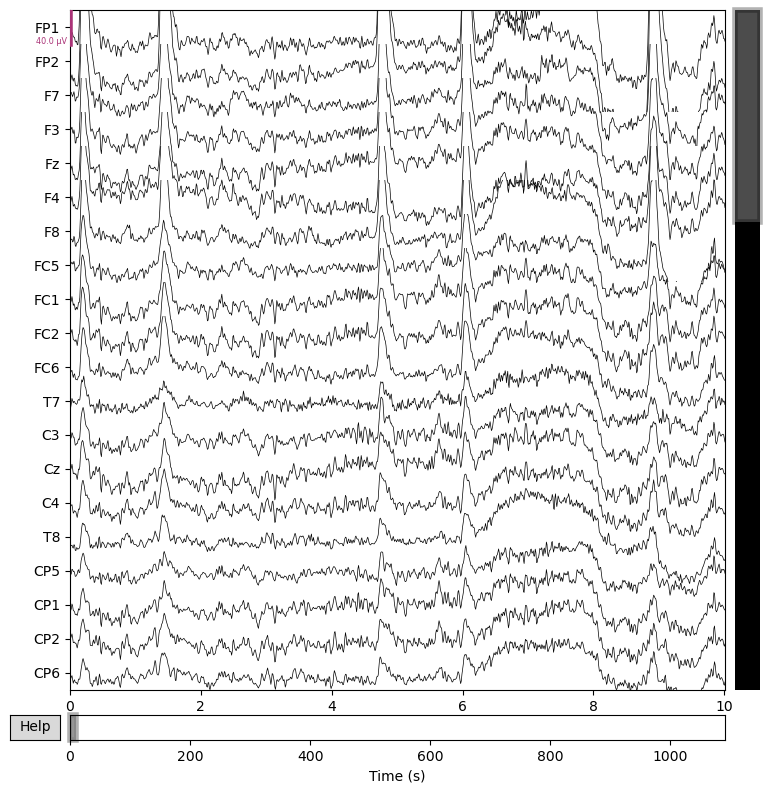

In [8]:
raw.plot();

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 331 samples (3.310 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


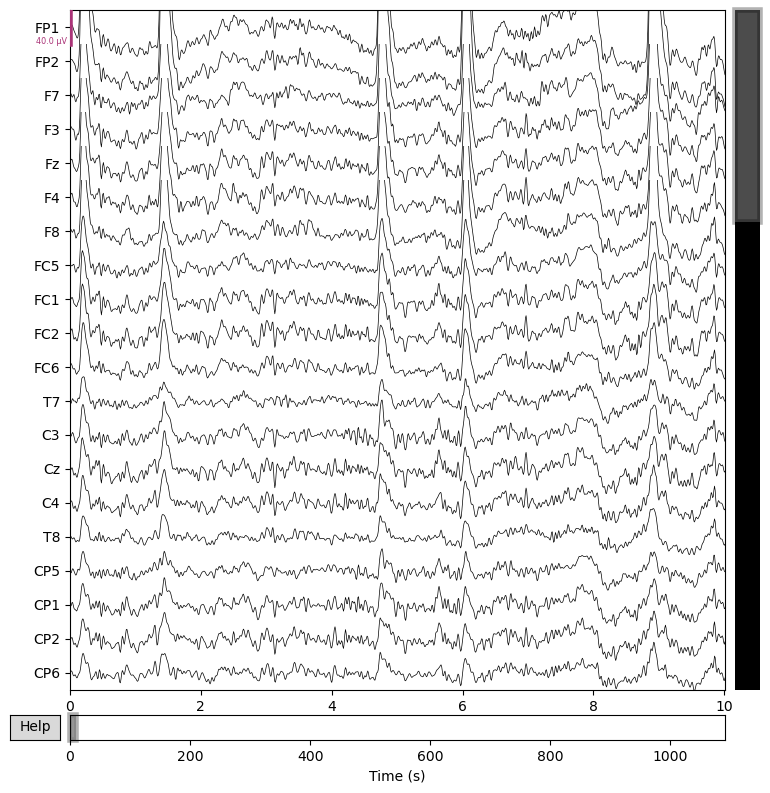

In [9]:
raw.filter(1, 20).plot();

In [11]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)
ica.fit(raw.copy().filter(8, 35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. In

Method,fastica
Fit,72 iterations on raw data (109098 samples)
ICA components,20
Available PCA components,63
Channel types,eeg
ICA components marked for exclusion,—


In [12]:
raw.plot_sources()

AttributeError: 'Raw' object has no attribute 'plot_sources'

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Creating RawArray with float64 data, n_channels=20, n_times=109098
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.


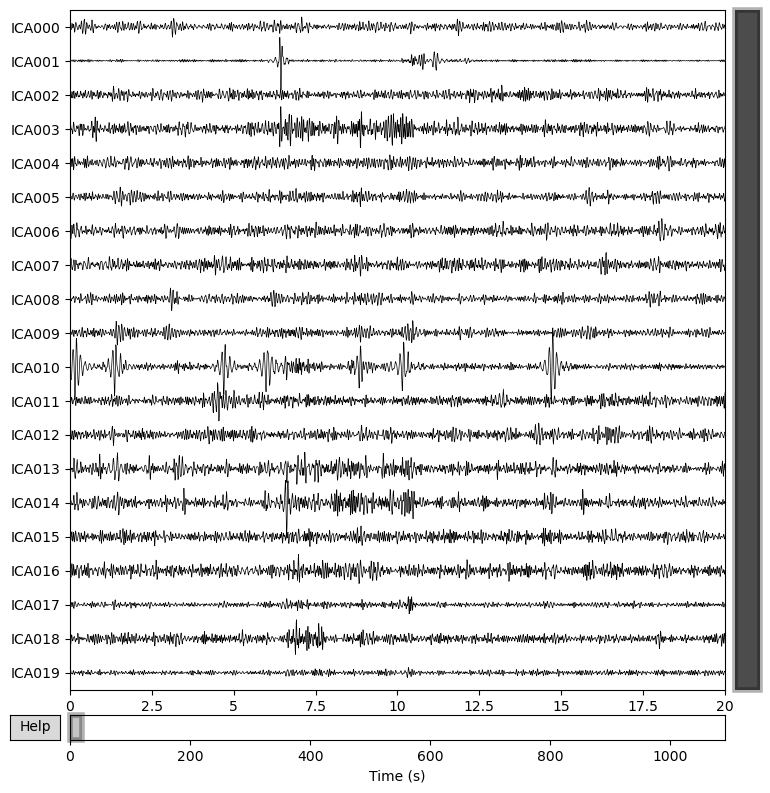

In [110]:
ica.plot_sources(raw.copy().filter(8, 35));

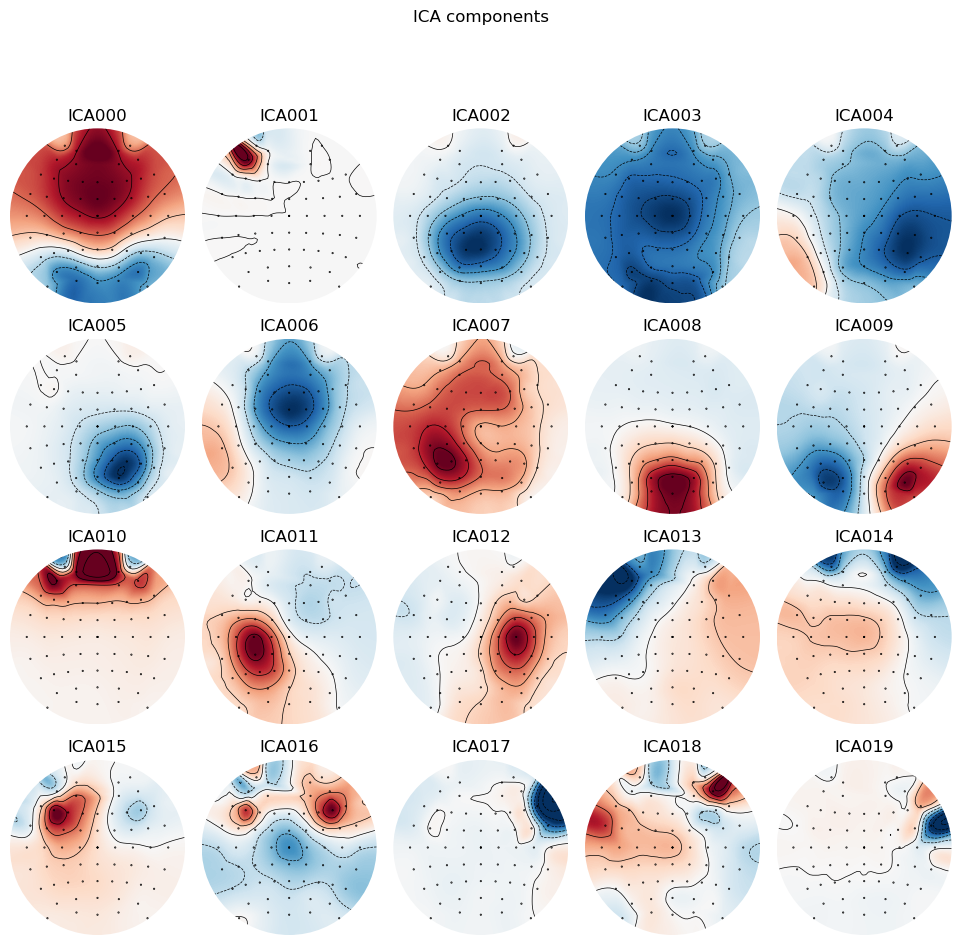

In [13]:
ica.plot_components();

In [16]:
ica.exclude = [1, 10, 14, 17, 18, 19]

In [112]:
bad_idx, scores = ica.find_bads_eog(raw, 'SO2', threshold=2)
print(bad_idx)

Using EOG channel: SO2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


[14, 10]


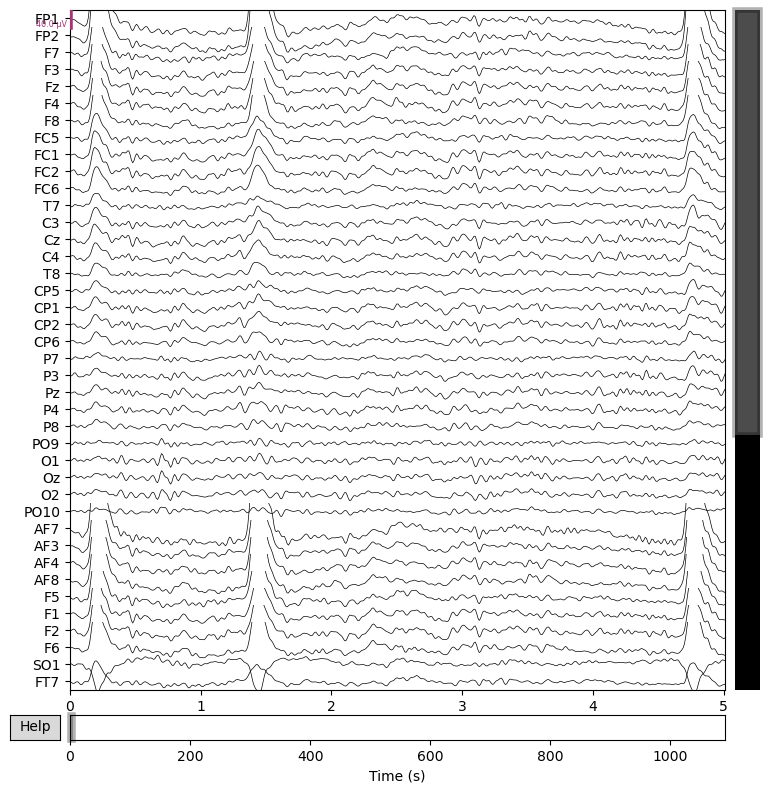

In [19]:
raw.plot(duration=5, n_channels=40);

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


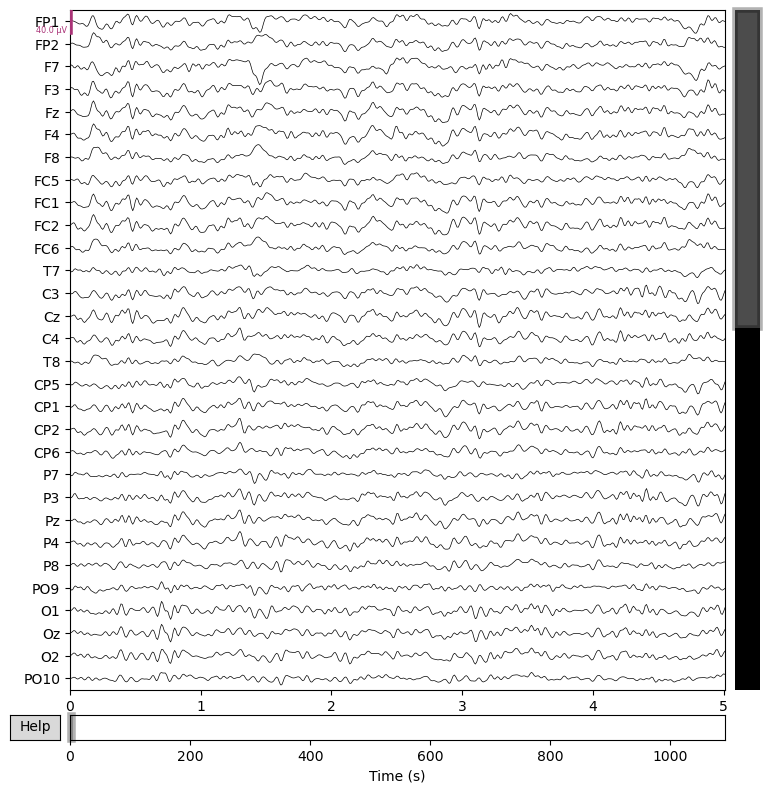

In [20]:
ica.apply(raw.copy(), exclude=ica.exclude).plot(duration=5, n_channels=30);